# Naive H1-B Lottery Probability Calculation

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import AnchoredText

## Background

Every year around 200K+ applicants file H1-B petition. However, USCIS have a cap on no. of H1-B visas they can award every year. If USCIS receives more than enough petitions to meet the regular cap during the first five business days, they use a computer-generated random selection process (commonly known as a “lottery”) to select a sufficient number of petitions needed to meet the cap.

An exemption from the H-1B cap is available for 20,000 petitions filed for a beneficiary who has obtained a U.S. master’s degree or higher (commonly known as the “advanced degree exemption”). If USCIS receives more than 20,000 petitions requesting an advanced degree exemption during the first five business days, they will use a lottery to randomly select 20,000 petitions for the advanced degree exemption before conducting the lottery to select petitions under the regular cap. Petitions not selected for the advanced degree exemption will be entered into the lottery for the regular cap. 

Up to 6,800 visas are set aside from the 65,000 each fiscal year for the H-1B1 program under the terms of the legislation implementing the U.S.-Chile and U.S.-Singapore free trade agreements. Unused visas in this group become available for H-1B use for the next fiscal year.

Note: Many applicants file multiple petitions under different employers to improve their chances. 



## Mathematics behind calculations

Let's assume a simple case where there are 200,000 applicants in a specific year. Out of which 40,000 has an advanced degree. So what we are interested here is 'What is the probability that an advanced degree candidate will get H1-B this year'? 

Let's approach this problem in an opposite way. We can look at what is the probability of an advanced degree candidate's application not getting picked. It can be calculated in two simple steps.

First, what is the probability that an advanced degree candidate's application doesn't get picked in advanced degree quota lottery. The probability is calculated as below.

$$ P(not\ getting\ picked\ in\ advanced\ degree\ quota) = \frac{\binom{39999}{20000}}{\binom{40000}{20000}} $$

Next, what is the probability that an advanced degree candidate's application doesn't get picked in regular quota lottery. The probability is calculated below.

$$ P(not\ getting\ picked\ in\ regular\ quota) = \frac{\binom{179999}{65000}}{\binom{180000}{65000}} $$


So finally, probability of an advanced degree candidate's application getting picked is:

$$ P(getting\ picked) = 1 - \frac{\binom{39999}{20000}}{\binom{40000}{20000}}\ X \frac{\binom{179999}{65000}}{\binom{180000}{65000}} = 0.6805$$

But thanks to the computational advancements, we don't have to manually calculate that probability anymore. The python function below will do that for us.



## Assumptions

Unused visas in H1-B1 group (i.e. 6800) become available for H-1B use for the next fiscal year. But it's always better to be conservative when estimating your chances in this kind of situation. So I assumed that all H1-B1 visas are used in the previous year. So only 58200 (i.e. 65000 - 6800) visas are available in the regular quota.

In [19]:
def h1bfate(n_applicants, n_masters, n_applications):
    """
    This function calculates the probability of an advanced degree candidate's application getting picked in the H1-B lottery
    n_applicants: Total no. of applicants
    n_masters: Total no. of advanced degree applicants
    n_applications: How many applications are filed (i.e. with different employers as I mentioned earlier)
    
    """
    masters_quota = 20000
    general_quota = 65000 - 6800
        
    if n_masters < 20000:
        masters_nonquota = 0
    else:
        masters_nonquota = n_masters - masters_quota
    
    #This calculates probability of application not getting picked in advanced degree quota      
    num = masters_nonquota
    den = n_masters
    n = n_applications
    
    while n > 1:
        num = num*(masters_nonquota - n + 1)
        den = den*(n_masters - n + 1)
        n = n - 1
    prob_notmq = num/float(den)
    
    #This calculates probability of application not getting picked in regular quota 
    num = n_applicants -  masters_quota - general_quota
    den = n_applicants - masters_quota
    n = n_applications
    
    while n > 1:
        num = num*(n_applicants -  masters_quota - general_quota - n + 1)
        den = den*(n_applicants - masters_quota - n + 1)
        n = n - 1
    prob_notgq = num/float(den)
        
    return round((1-prob_notmq*prob_notgq)*100,2)

## Visualizing probability over possibilities

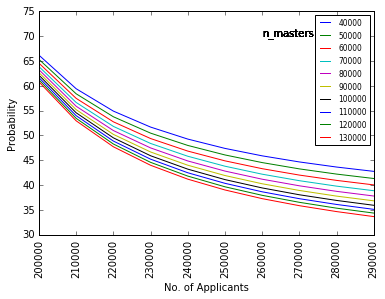

In [20]:
chances = []

# varying no. of applicants from 200k to 290k and no. of advanced degree applicants from 40k to 130k

for n_applicants in range(200000,300000,10000):
    for n_masters in range(40000,140000,10000):
        chances.append(h1bfate(n_applicants, n_masters,1))
        
chances = np.array(chances)
chances = chances.reshape(10,10) 

n_masters =  range(40000,140000,10000)

# Some basic plotting
for i in range(len(chances)):
    plt.plot(range(200000,300000,10000),chances[i], label = n_masters[i])
    plt.xticks(rotation=90)
    plt.xlabel('No. of Applicants')
    plt.ylabel('Probability')
    plt.ylim(30,75)
    plt.legend(loc='upper right',prop={'size':7.5})
    plt.annotate('n_masters', xy =(260000, 70), xytext=(260000, 70))


# What are my chances if I file an extra petition? 

Let's look at previous year's statistics. Total no. of applicants were about 233,000, out of which 110,000 were advanced degree candidates

In [17]:
str(h1bfate(233000, 110000, 2) - h1bfate(233000, 110000, 1)) + '% increase - WOW!!'


'24.1% increase - WOW!!'

### That's a great increase in your chances if you can afford to file an extra petition under different employer